# Preprocessing and understanding the database
Download database from https://www.kaggle.com/code/valentynsichkar/traffic-signs-classification-with-cnn/

In [1]:
# General imports
import numpy as np
import pandas as pd
import pickle
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Our own functions
from helpers import convert_to_grid, save_data_pickle, load_data_from_pickle

In [3]:
# Replace with your own database download directory
base_path = 'E:/input'
pickle_index = 2

## Loading the database

In [4]:
# Opening file for reading in binary mode
file_path = base_path +'/data'+str(pickle_index)+'.pickle'
with open(file_path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type
print(f"{len(data)=}\n{type(data)=}\n{data.keys()=}")

data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)
print(f"{data['x_train'].shape=}")
print(f"{data['x_validation'].shape=}")
print(f"{data['x_test'].shape=}")

len(data)=7
type(data)=<class 'dict'>
data.keys()=dict_keys(['x_train', 'y_test', 'x_test', 'x_validation', 'labels', 'y_train', 'y_validation'])
data['x_train'].shape=(86989, 32, 32, 3)
data['x_validation'].shape=(4410, 32, 32, 3)
data['x_test'].shape=(12630, 32, 32, 3)


## Storing the data in pickle files

In [5]:
import os
current_directory = os.getcwd()
print("Current directory :", current_directory)
print(os.path.exists("../SE4AI_data/"))

Current directory : C:\Users\gabri\Documents\Unisa\Courses\SE4AI\SE4AI
True


In [7]:
# Save datasets
save_data_pickle(data['x_train'], "../SE4AI_data/x_train"+str(pickle_index)+".pickle")
save_data_pickle(data['x_validation'], "../SE4AI_data/x_val"+str(pickle_index)+".pickle")
save_data_pickle(data['x_test'], "../SE4AI_data/x_test"+str(pickle_index)+".pickle")

# Save labels
save_data_pickle(data['y_train'], "../SE4AI_data/y_train"+str(pickle_index)+".pickle")
save_data_pickle(data['y_validation'], "../SE4AI_data/y_val"+str(pickle_index)+".pickle")
save_data_pickle(data['y_test'], "../SE4AI_data/y_test"+str(pickle_index)+".pickle")

## Opening and reading the database

In [8]:
# Opening the files
pickle_index = 2
x_train, y_train, x_val, y_val, x_test, y_test = load_data_from_pickle(pickle_index)

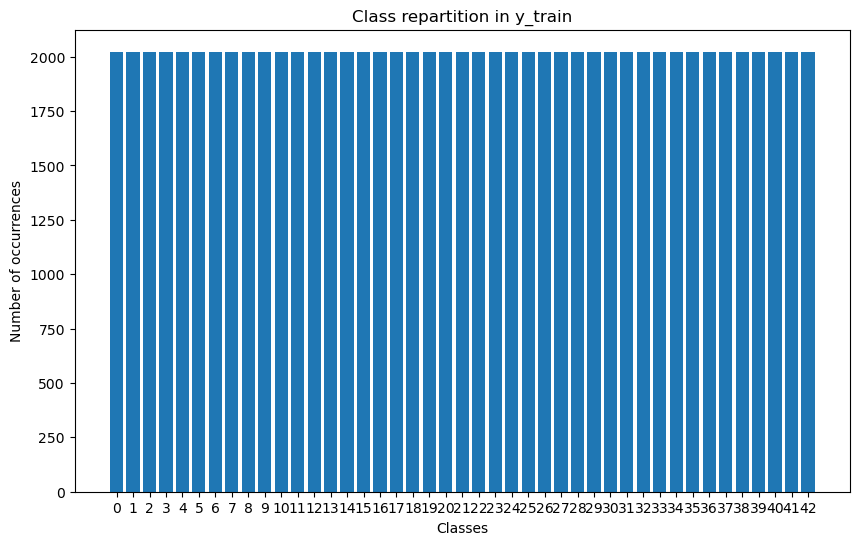

In [3]:
#Checking the repartition within training data
unique, counts = np.unique(y_train, return_counts=True)
# Historgramm
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, tick_label=unique)
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.title('Class repartition in y_train')
plt.show()
# The training data is perfectly balanced

(81, 32, 32, 3)


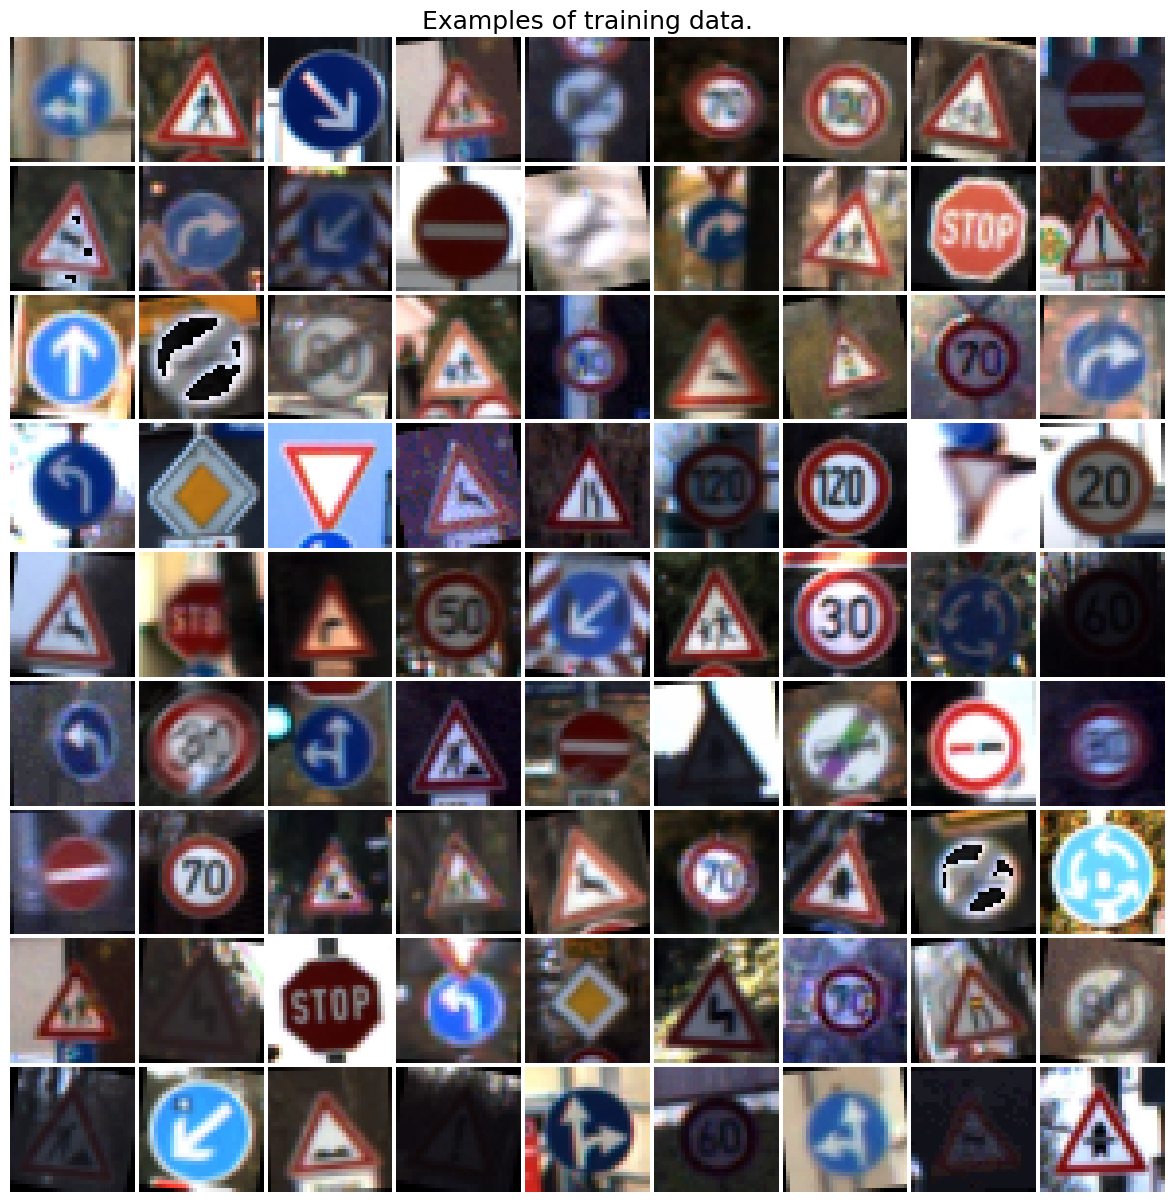

In [9]:
# Visualizing some examples of training data
examples = x_train[:81, :, :, :]
print(examples.shape)  # (81, 32, 32, 3)

# Plotting some examples
fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15, 15)
plt.title('Examples of training data.', fontsize=18)
plt.show()

# Saving the plot
fig.savefig('images/training_examples.png')
plt.close()